# Summary statistics

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('classic')

#plt.rcParams["figure.dpi"] = 200
plt.rcParams["figure.facecolor"] = 'white'
plt.rcParams["font.family"] = 'serif'

db_version = 'ebnerd_large'  # Change to either 'ebnerd_demo', 'ebnerd_small', or 'ebnerd_large'

## articles.parquet

In [3]:
# Load the dataset
file_path = f'data/{db_version}/articles.parquet'
articles_df = pd.read_parquet(file_path)

# Display the first five entries of the dataset
articles_df.head().T  # TRANSPOSED for easier viewing!

,0,1,2,3,4
article_id,3000022,3000063,3000613,3000700,3000840
title,Hanks beskyldt for mishandling,Bostrups aske spredt i Furesøen,Jesper Olsen ramt af hjerneblødning,Madonna topløs med heste,Otto Brandenburg er død
subtitle,Tom Hanks har angiveligt mishandlet sin afdøde...,Studieværten blev mindet med glad festlighed,Den tidligere danske landsholdsspiller i fodbo...,47-årige Madonna poserer både topløs og sammen...,Sangeren og skuespilleren Otto Brandenburg er ...
last_modified_time,2023-06-29 06:20:32,2023-06-29 06:20:32,2023-06-29 06:20:33,2023-06-29 06:20:33,2023-06-29 06:20:33
premium,False,False,False,False,False
body,Tom Hanks skulle angiveligt have mishandlet si...,Strålende sensommersol. Jazzede toner. Glas me...,"Jesper Olsen, der er noteret for 43 kampe på d...",Skal du have stillet Madonna-sulten inden konc...,"'Og lidt for Susanne, Birgitte og Hanne... ' '..."
published_time,2006-09-20 09:24:18,2006-09-24 07:45:30,2006-05-09 11:29:00,2006-05-04 11:03:12,2007-03-01 18:34:00
image_ids,[3518381],"[3170935, 3170939]",[3164998],[3172046],[3914446]
article_type,article_default,article_default,article_default,article_default,article_default
url,https://ekstrabladet.dk/underholdning/udlandke...,https://ekstrabladet.dk/nyheder/samfund/articl...,https://ekstrabladet.dk/sport/fodbold/landshol...,https://ekstrabladet.dk/underholdning/udlandke...,https://ekstrabladet.dk/nyheder/samfund/articl...


**The 21 features in the Articles dataframe can approximately be classified into the following groups.**

Content information:
* `article_id` - Unique identifier.
* `title` - Danish-language title.
* `subtitle` - Article abstract.
* `body` - Full-text article content.
* `published-time` & `last_modified_time` - Timestamps for publication and last modification.

Classification and metadata:
* `category` - Numeric category identifier.
* `category_str` - Written category (e.g., *nyheder*).
* `subcategory` - Numeric subcategory identifier(s).
* `article_type` - Content type (e.g., *article_default*, *gallery*).
* `premium` - Indicates if the article is behind a paywall.

Interaction metrics:
* `total_inviews` - Number of views in the first 7 days.*
* `total_pageviews` - Click count within the first 7 days.*
* `total_read_time` - Accumulated read time.*

*These metrics are only available for articles published after February 16, 2023.

Machine-generated features:
* `ner_clusters` & `entity_groups` - Named entity recognition data.
* `topics` - Topic(s) derived from proprietary topic models.
* `sentiment_score` - Sentiment score.
* `sentiment_label` - Sentiment classification (*Positive*, *Neutral*, or *Negative*).

Miscellaneous:
* `image_ids` - Associated image(s).
* `url` - article link.

---

In [4]:
# Display the length of the dataset
len(articles_df)

125541

**The dataset comprises 125,541 articles.**

---

In [5]:
# Calculate missing data counts and percentages
missing_data = articles_df.isnull().sum()
missing_percentage = (articles_df.isnull().mean() * 100)

# Display the results
print(pd.DataFrame({'Missing count': missing_data, 'Missing percentage': missing_percentage}).round(1))

                    Missing count  Missing percentage
article_id                      0                 0.0
title                           0                 0.0
subtitle                        0                 0.0
last_modified_time              0                 0.0
premium                         0                 0.0
body                            0                 0.0
published_time                  0                 0.0
image_ids                   14322                11.4
article_type                    0                 0.0
url                             0                 0.0
ner_clusters                    0                 0.0
entity_groups                   0                 0.0
topics                          0                 0.0
category                        0                 0.0
subcategory                     0                 0.0
category_str                    0                 0.0
total_inviews              107205                85.4
total_pageviews            1

**The table above displays the number and percentage of missing values for each column. Notably, the interaction metrics are absent for 85-86% of the articles. This is because these metrics are only available for articles published after 16 February 2023.**

---

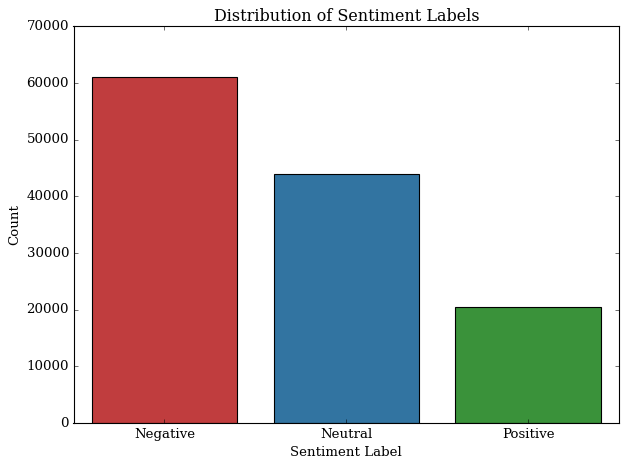

In [6]:
# Calculate sentiment counts
sentiment_counts = articles_df['sentiment_label'].value_counts()

# Create a barplot
plt.figure(figsize=(8, 6))
sns.barplot(
    x=sentiment_counts.index, 
    y=sentiment_counts.values, 
    hue=sentiment_counts.index,
    palette={'Positive': '#2ca02c', 'Neutral': '#1f77b4', 'Negative': '#d62728'},
    legend=False
)

# Add labels and title
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')

# Display the plot
plt.tight_layout()
plt.show()

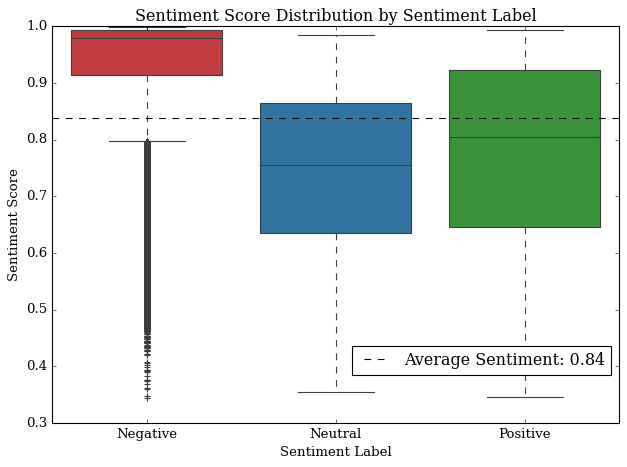

In [7]:
# Calculate the average sentiment score
average_sentiment = articles_df['sentiment_score'].mean()

# Create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(
    x='sentiment_label', 
    y='sentiment_score', 
    data=articles_df, 
    hue='sentiment_label',
    dodge=False,
    palette={'Positive': '#2ca02c', 'Neutral': '#1f77b4', 'Negative': '#d62728'},
    legend=False
)

# Add a dashed line for the average sentiment score
plt.axhline(y=average_sentiment, color='black', linestyle='--', linewidth=1, label=f'Average Sentiment: {average_sentiment:.2f}')

# Add labels and title
plt.title('Sentiment Score Distribution by Sentiment Label')
plt.xlabel('Sentiment Label')
plt.ylabel('Sentiment Score')

# Add a legend
plt.legend(loc='lower right', bbox_to_anchor=(1, 0.1))

# Display the plot
plt.tight_layout()
plt.show()

**_Negative_ sentiment is the most common, followed by _Neutral_ and _Positive_. Despite this, the average sentiment score is 0.84, indicating an overall neutral-to-positive tone.**

---

In [8]:
# Calculate unique counts for each column
unique_counts = []

for col in articles_df.columns:
    if articles_df[col].apply(lambda x: isinstance(x, (int, float, str, bool, type(None)))).all():
        unique_count = articles_df[col].nunique()
    else:
        unique_values = set()
        for item in articles_df[col]:
            if isinstance(item, (list, np.ndarray)):
                unique_values.update(item)
        unique_count = len(unique_values)

    unique_counts.append([col, unique_count])

# Display the results
unique_counts_df = pd.DataFrame(unique_counts, columns=['Column', 'Unique count'])
unique_counts_df.set_index('Column', inplace=True)
print(unique_counts_df.to_string(index=True, index_names=False))

                    Unique count
article_id                125541
title                     122053
subtitle                  116492
last_modified_time             0
premium                        2
body                      119649
published_time                 0
image_ids                 217081
article_type                  16
url                       125541
ner_clusters              107055
entity_groups                  6
topics                        78
category                      32
subcategory                  262
category_str                  33
total_inviews              15513
total_pageviews            12781
total_read_time            15847
sentiment_score             5589
sentiment_label                3


In [9]:
# Display the most common article categories
category_counts = articles_df['category_str'].value_counts().head(10)
category_counts_df = category_counts.reset_index()
category_counts_df.columns = ['Category', 'Count']
category_counts_df.set_index('Category', inplace=True)
print(category_counts_df.to_string(header=['Count'], index=True, index_names=False))


               Count
nyheder        27876
underholdning  24909
krimi          22579
sport          18767
side9           4628
forbrug         4328
sex_og_samliv   4030
musik           3641
auto            3513
nationen        3363


**The dataset includes 33 unique top-level categories and 262 unique subcategories. The most common categories are _nyheder_ (news), _underholdning_ (entertainment), and _krimi_ (crime).**

---

## behaviors.parquet

In [10]:
# Load the training dataset
file_path = f'data/{db_version}/train/behaviors.parquet'
behaviors_train_df = pd.read_parquet(file_path)

# Load the validation dataset
file_path = f'data/{db_version}/validation/behaviors.parquet'
behaviors_validation_df = pd.read_parquet(file_path)

# Display the first five entries of the training dataset (hereafter referred to as "the training dataset" or simply "the dataset").
behaviors_train_df.head(50).T  # TRANSPOSED for easier viewing!

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
impression_id,47727,47731,47736,47737,47740,47746,47753,47756,47766,47767,...,48066,48077,48083,48092,48097,48114,48115,48120,48124,48129
article_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9774652.0,...,9759544.0,NaN,NaN,NaN,NaN,9774652.0,NaN,9774652.0,9774652.0,9774652.0
impression_time,2023-05-21 21:35:07,2023-05-21 21:32:33,2023-05-21 21:33:32,2023-05-21 21:38:17,2023-05-21 21:36:02,2023-05-21 21:31:14,2023-05-21 21:03:22,2023-05-21 21:03:02,2023-05-21 21:08:00,2023-05-21 21:08:35,...,2023-05-21 21:09:05,2023-05-21 21:40:53,2023-05-21 21:38:43,2023-05-21 21:30:42,2023-05-21 21:13:17,2023-05-21 21:23:03,2023-05-21 21:18:46,2023-05-21 21:24:31,2023-05-21 21:24:40,2023-05-21 21:23:21
read_time,20.0,13.0,17.0,27.0,48.0,27.0,16.0,11.0,34.0,53.0,...,89.0,22.0,8.0,18.0,22.0,14.0,27.0,5.0,15.0,9.0
scroll_percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,100.0,...,100.0,NaN,NaN,NaN,NaN,100.0,NaN,100.0,100.0,100.0
device_type,1,1,1,1,1,1,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
article_ids_inview,"[9482380, 9775183, 9744403, 9775297, 9774020, ...","[9774557, 9774516, 9775331, 9775277, 9759966]","[9759966, 9774557, 9775352, 9746360, 9772601, ...","[9774580, 9775131, 9775202, 9774789, 9774972, ...","[9774826, 9775171, 9775076, 9769624, 9775056, ...","[9186608, 9770288, 9771051, 9773947, 9759544, ...","[9774516, 9775331, 9738729, 9775277, 9775323, ...","[9773947, 9774461, 9759544, 9771051, 9775371]","[9774516, 9774652, 9773947, 9754160, 9775331, ...","[9773947, 9738729, 9774461, 9746360, 9695098, ...",...,"[9740880, 9559425, 9740551, 9746011, 9754160, ...","[9775256, 9746360, 9775183, 9538375, 9482380, ...","[9775361, 9775432, 9775371, 9773947, 9759544, ...","[9774516, 9532638, 9770028, 9775402, 9773947, ...","[9771051, 9770028, 9759544, 9774557, 9759966, ...","[9759966, 9738729, 9774557, 9775277, 9775323, ...","[9771051, 9774461, 9775331, 9774557, 9775371, ...","[9773744, 9775171, 9774826, 9775056, 9774079]","[9774555, 9775076, 9765941, 9769624, 9775142, ...","[9772275, 9775183, 9538375, 9774079, 9775297, ..."
article_ids_clicked,[9775183],[9759966],[9774652],[9775184],[9774648],[9774461],[9775323],[9759544],[9774652],[9775256],...,[9740551],[9775183],[9774461],[9759544],[9774652],[9775323],[9774652],[9775171],[9775142],[9772275]
user_id,18293,18293,18293,18293,18293,18293,18596,18596,18695,18695,...,20459,20474,20474,20514,20642,20810,20810,20810,20810,20810
is_sso_user,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [36]:
(behaviors_train_df['article_ids_clicked'].apply(lambda x: len(x) <= 1).sum() / len(behaviors_train_df)) * 100

99.50485291228617

**The 17 features in the Behaviors dataframe can approximately be classified into the following groups.**

User and session information:
* `impression_id` - Unique identifier for an impression.
* `user_id` - Anonymised user identifier.
* `session_id` - Unique identifier for a user's browsing session.

Article interaction:
* `article_id` - Unique ID of a news article.
* `inview_article_ids` - List of articles registered as seen by the user.
* `clicked_article_ids` - List of articles clicked in the impression.
* `time` - Timestamp of the impression.
* `readtime` - Amount of time (in seconds) a user spent on a given page.
* `scroll_percentage` - Percentage of an article that a user scrolls through.
* `next_readtime` - Time a user spends on the next clicked article.
* `next_scroll_percentage` - Scroll percentage for a user's next article interaction.

User demographics and device information:
* `device_type` - Type of device used (_desktop_ (0), _mobile_ (2), _tablet_ (3), or _unknown_ (0)).
* `sso_status` - Indicates if a user is logged in through Single Sign-On.
* `subscription_status` - Indicates if the user is a paid subscriber.
* `gender` - Gender of the user (_male_ (0) or _female_ (1)).
* `postcode` - User's postcode, aggregated at the district level (_metropolitan_ (0), _rural district_ (1), _municipality_ (2), _provincial_ (3), or _big city_ (4)).
* `age` - Age of the user, categorised into bins of 10 years.

Miscellaneous:
* `is_beyond_accuracy` - Extra feature in the test set for beyond-accuracy computations.

---

In [10]:
# Display the length of the training dataset
print(f'Length of the training dataset:     {len(behaviors_train_df)}')

# Display the length of the validation dataset
print(f'Length of the validation dataset:   {len(behaviors_validation_df)}')

Length of the training dataset:     12063890
Length of the validation dataset:   12566385


**The training dataset comprises 12,063,890 datapoints, while the validation dataset comprises 12,566,385 datapoints.**

---

In [11]:
# Calculate missing data counts and percentages
missing_data = behaviors_train_df.isnull().sum()
missing_percentage = (behaviors_train_df.isnull().mean() * 100)

# Display the results
print(pd.DataFrame({'Missing count': missing_data, 'Missing percentage': missing_percentage}).round(1))

                        Missing count  Missing percentage
impression_id                       0                 0.0
article_id                    8458027                70.1
impression_time                     0                 0.0
read_time                           0                 0.0
scroll_percentage             8523902                70.7
device_type                         0                 0.0
article_ids_inview                  0                 0.0
article_ids_clicked                 0                 0.0
user_id                             0                 0.0
is_sso_user                         0                 0.0
gender                       11176907                92.6
postcode                     11795148                97.8
age                          11694243                96.9
is_subscriber                       0                 0.0
session_id                          0                 0.0
next_read_time                 319928                 2.7
next_scroll_pe

**The table above displays the number and percentage of missing values for each column.**

---

In [12]:
# Calculate unique counts for each column
unique_counts = []

for col in behaviors_train_df.columns:
    if behaviors_train_df[col].apply(lambda x: isinstance(x, (int, float, str, bool, type(None)))).all():
        unique_count = behaviors_train_df[col].nunique()
    else:
        unique_values = set()
        for item in behaviors_train_df[col]:
            if isinstance(item, (list, np.ndarray)):
                unique_values.update(item)
        unique_count = len(unique_values)

    unique_counts.append([col, unique_count])

# Display the results
unique_counts_df = pd.DataFrame(unique_counts, columns=['Column', 'Unique count'])
unique_counts_df.set_index('Column', inplace=True)
print(unique_counts_df.to_string(index=True, index_names=False))

                        Unique count
impression_id               12063890
article_id                      7041
impression_time                    0
read_time                       1801
scroll_percentage                101
device_type                        4
article_ids_inview             10116
article_ids_clicked             4766
user_id                       788090
is_sso_user                        2
gender                             3
postcode                           5
age                               11
is_subscriber                      2
session_id                   6227464
next_read_time                  1801
next_scroll_percentage           101


**The table above displays the unique counts for each column.**

---

## history.parquet

In [13]:
# Load the training dataset
file_path = f'data/{db_version}/train/history.parquet'
history_train_df = pd.read_parquet(file_path)

# Load the validation dataset
file_path = f'data/{db_version}/validation/history.parquet'
history_validation_df = pd.read_parquet(file_path)

# Display the first five entries of the training dataset (hereafter referred to as "the training dataset" or simply "the dataset").
history_train_df.head().T  # TRANSPOSED for easier viewing!

,0,1,2,3,4
user_id,10029,10033,10034,10041,10103
impression_time_fixed,"[2023-04-28T06:16:57.000000, 2023-04-28T06:17:...","[2023-04-27T11:11:32.000000, 2023-04-27T11:12:...","[2023-04-30T09:46:57.000000, 2023-04-30T09:47:...","[2023-04-27T15:15:28.000000, 2023-04-27T15:16:...","[2023-04-27T15:37:35.000000, 2023-04-27T15:38:..."
scroll_percentage_fixed,"[23.0, 69.0, 27.0, nan, 47.0, 38.0, 100.0, 12....","[33.0, 41.0, 33.0, 100.0, 68.0, 38.0, 1.0, 58....","[nan, 88.0, 27.0, nan, 23.0, 100.0, 100.0, 22....","[78.0, 41.0, 4.0, 16.0, 22.0, 32.0, 11.0, 94.0...","[100.0, nan, 100.0, 100.0, 100.0, 28.0, 82.0, ..."
article_id_fixed,"[9735579, 9739888, 9739471, 9739864, 9738441, ...","[9738139, 9738263, 9738139, 9738760, 9738777, ...","[9742693, 9742686, 9744016, 9743818, 9744922, ...","[9739035, 9738303, 9737243, 9739634, 9739802, ...","[9739035, 9739164, 9741803, 9740087, 9741986, ..."
read_time_fixed,"[28.0, 24.0, 11.0, 107.0, 8.0, 7.0, 20.0, 5.0,...","[2.0, 2.0, 718.0, 18.0, 26.0, 78.0, 3.0, 11.0,...","[21.0, 103.0, 28.0, 0.0, 5.0, 34.0, 14.0, 14.0...","[12.0, 11.0, 3.0, 3.0, 4.0, 13.0, 29.0, 24.0, ...","[45.0, 8.0, 61.0, 72.0, 56.0, 3.0, 22.0, 16.0,..."


**The 5 features in the History dataframe can approximately be classified into the following groups.**

User information:
* `user_id` - Anonymised user identifier.

Article interaction history:
* `article_ids` - List of articles clicked by the user.
* `timestamps` - Timestamps of when the articles were clicked.
* `read_times` - Read times of the clicked articles.
* `scroll_percentages` - Scroll percentages of the clicked articles.

---

In [14]:
# Display the length of the training dataset
print(f'Length of the training dataset:     {len(history_train_df)}')

# Display the length of the validation dataset
print(f'Length of the validation dataset:   {len(history_validation_df)}')

Length of the training dataset:     788090
Length of the validation dataset:   791582


**The training dataset comprises 788,090 datapoints, while the validation dataset comprises 791,582 datapoints.**

---

In [15]:
# Calculate missing data counts and percentages
missing_data = history_train_df.isnull().sum()
missing_percentage = (history_train_df.isnull().mean() * 100)

# Display the results
print(pd.DataFrame({'Missing count': missing_data, 'Missing percentage': missing_percentage}).round(1))

                         Missing count  Missing percentage
user_id                              0                 0.0
impression_time_fixed                0                 0.0
scroll_percentage_fixed              0                 0.0
article_id_fixed                     0                 0.0
read_time_fixed                      0                 0.0


**The dataset contains no missing values.**

---

In [16]:
# Calculate unique counts for each column
unique_counts = []

for col in history_train_df.columns:
    if history_train_df[col].apply(lambda x: isinstance(x, (int, float, str, bool, type(None)))).all():
        unique_count = history_train_df[col].nunique()
    else:
        unique_values = set()
        for item in history_train_df[col]:
            if isinstance(item, (list, np.ndarray)):
                unique_values.update(item)
        unique_count = len(unique_values)

    unique_counts.append([col, unique_count])

# Display the results
unique_counts_df = pd.DataFrame(unique_counts, columns=['Column', 'Unique count'])
unique_counts_df.set_index('Column', inplace=True)
print(unique_counts_df.to_string(index=True, index_names=False))

                         Unique count
user_id                        788090
impression_time_fixed         1808134
scroll_percentage_fixed      13086604
article_id_fixed                69140
read_time_fixed                  1801


**The table above displays the unique counts for each column.**

---